In [2]:
import moviepy.editor as mpe
import numpy as np
from PIL import Image
from skimage.color import rgb2gray
from sklearn import decomposition
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
video = mpe.VideoFileClip("download.mp4")

In [4]:
video.ipython_display(width=300)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [5]:
video.duration

50.0

## Tranform Video to Matrix

In [6]:
def create_data_matrix_from_video(clip, k=5, scale=50):
    k = max(1, int(k))
    num_frames = k * int(clip.duration)
    data_matrix = []
    
    for i in range(num_frames):
        frame = clip.get_frame(i / float(k))
        gray_frame = rgb2gray(frame)
        resized_frame = Image.fromarray((gray_frame * 255).astype(np.uint8)).resize((int(320 * (scale/100)), int(240 * (scale/100))), Image.Resampling.LANCZOS)
        data_matrix.append(np.array(resized_frame).reshape(-1))
    
    return np.vstack(data_matrix).T

## Resizing and viewing data

In [7]:
scale = 25 
dims = (int(240 * (scale/100)), int(320 * (scale/100)))

In [8]:
M = create_data_matrix_from_video(video, k=100, scale=scale)

In [9]:
print(dims, M.shape)

(60, 80) (4800, 5000)


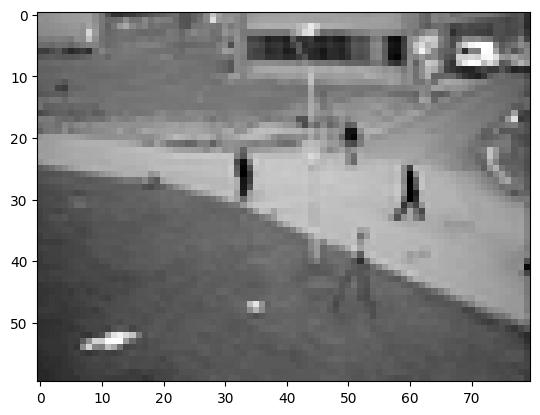

In [10]:
plt.imshow(np.reshape(M[:,140], dims), cmap='gray')

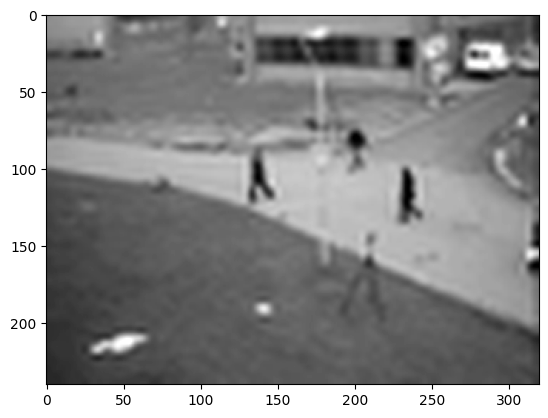

In [11]:
frame_index = 150  
original_dim = (320, 240)
frame = M[:, frame_index]  

frame_image = Image.fromarray(np.reshape(frame, dims))
upscaling = frame_image.resize(original_dim, Image.Resampling.LANCZOS)

plt.imshow(upscaling, cmap='gray')
plt.show()


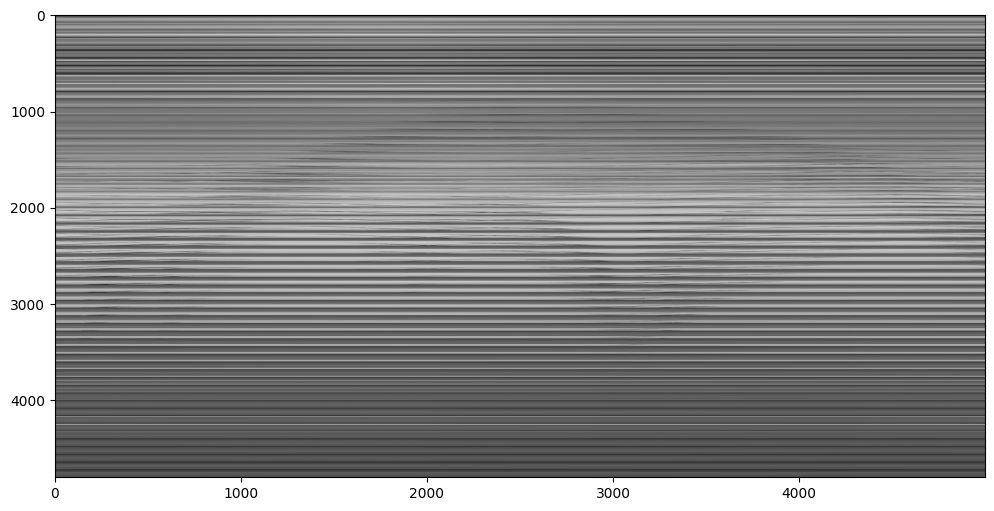

In [12]:
plt.figure(figsize=(12, 6))
plt.imshow(M, cmap='gray', aspect='auto') 

# PCA

In [13]:
def power_method(C):
    n,m = C.shape
    v = np.random.randn(n, 1)
    
    for _ in range(100): 
        v = np.dot(C, v)  
        v = v / np.linalg.norm(v)  
    
    eigenvalue = float(v.T @ C @ v) 
    return v, eigenvalue 


In [14]:
C = M @ M.T

In [15]:
v1, λ1 = power_method(C)

In [17]:
p1 = M * v1

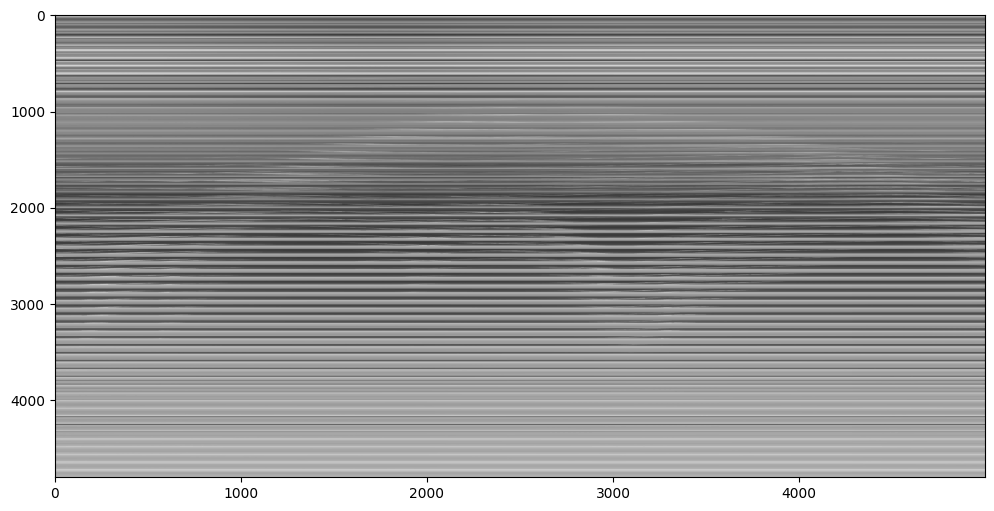

In [18]:
plt.figure(figsize=(12, 6))
plt.imshow(p1, cmap='gray', aspect='auto') 

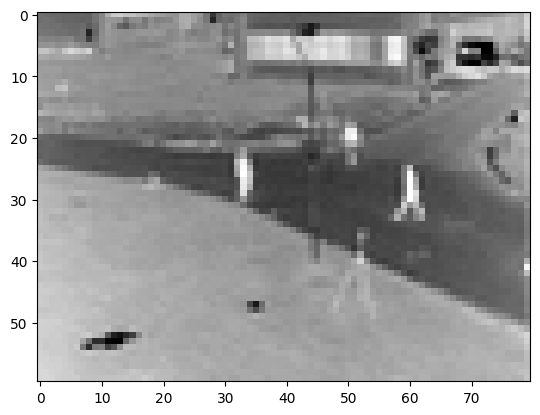

In [19]:
plt.imshow(np.reshape(p1[:,140], dims), cmap='gray')

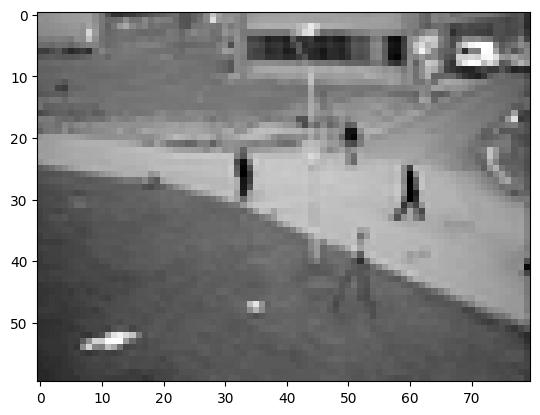

In [20]:
plt.imshow(np.reshape(M[:,140], dims), cmap='gray')

# SVD

In [21]:
u, s, v = decomposition.randomized_svd(M, 2)

In [23]:
low_rank = u @ np.diag(s) @ v

In [24]:
low_rank.shape

(4800, 5000)

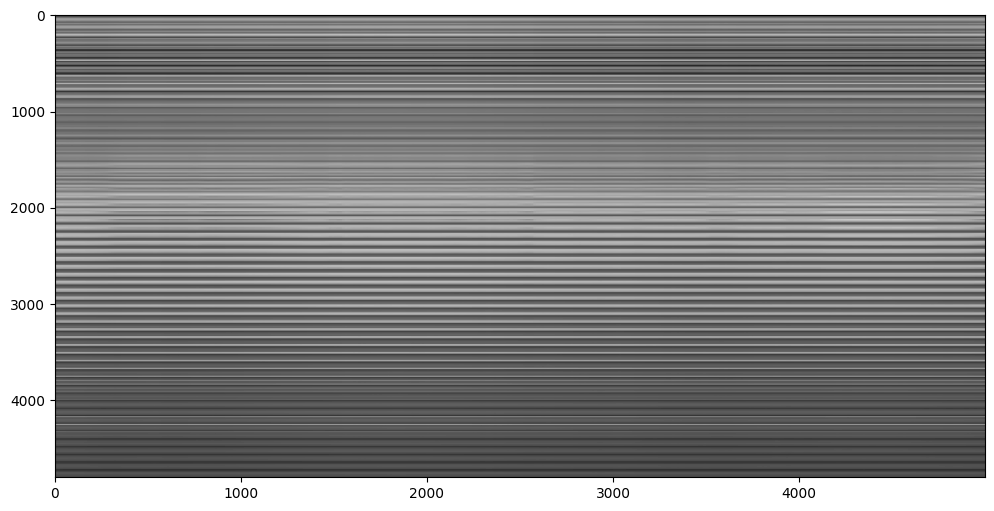

In [25]:
plt.figure(figsize=(12, 6))
plt.imshow(low_rank, cmap='gray', aspect='auto') 

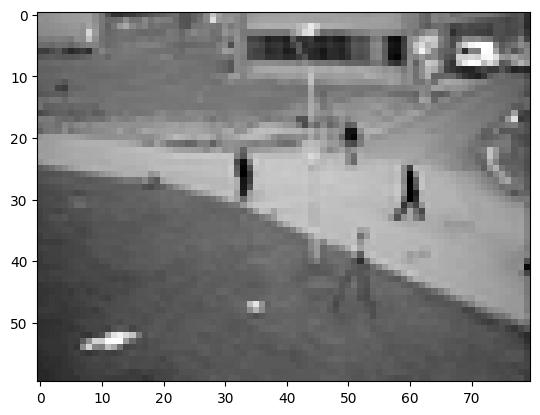

In [26]:
plt.imshow(np.reshape(M[:,140], dims), cmap='gray')

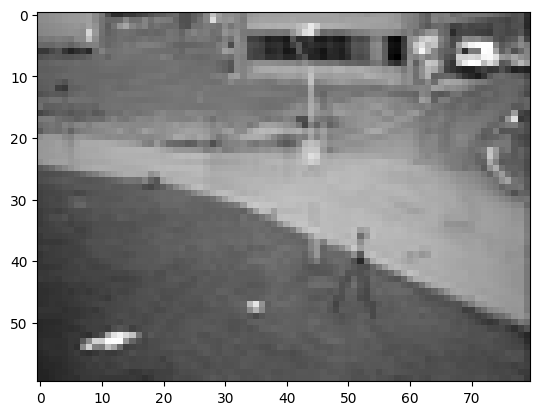

In [27]:
plt.imshow(np.reshape(low_rank[:,140], dims), cmap='gray')

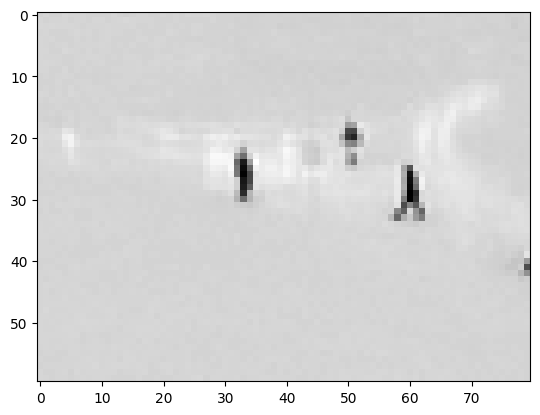

In [28]:
plt.imshow(np.reshape(M[:,140] - low_rank[:,140], dims), cmap='gray')